In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from concurrent.futures import ProcessPoolExecutor
from PIL import Image
from scipy.ndimage import generic_filter


In [12]:
# image_path = '/home/andmin/Pictures/birb.jpg'
image_path = '/home/andmin/Pictures/sobol.jpg'
# image_path = '/home/andmin/Pictures/tmp.png'
img = cv2.imread(image_path)


In [3]:
def apply_convolution_cv2(image, kernel):
    img_height, img_width, channels = image.shape
    kernel_height, kernel_width = kernel.shape

    assert kernel_height % 2 == 1 and kernel_width % 2 == 1, "Kernel dimensions must be odd."

    pad_top = kernel_height // 2
    pad_bottom = kernel_height - pad_top - 1
    pad_left = kernel_width // 2
    pad_right = kernel_width - pad_left - 1

    padded_image = np.pad(image, ((pad_top, pad_bottom), (pad_left, pad_right), (0, 0)), mode='symmetric')

    result_array = np.zeros_like(image)

    for c in range(channels):
        for i in range(img_height):
            for j in range(img_width):
                region = padded_image[i:i + kernel_height, j:j + kernel_width, c]
                result_array[i, j, c] = np.sum(region * kernel)

    return result_array

In [4]:
def show_cv2(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Original Image

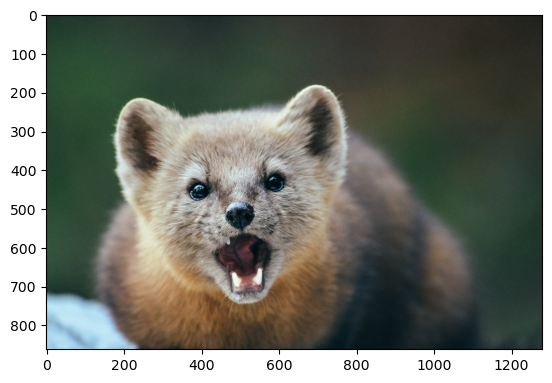

In [14]:
show_cv2(img)

## Blur Box

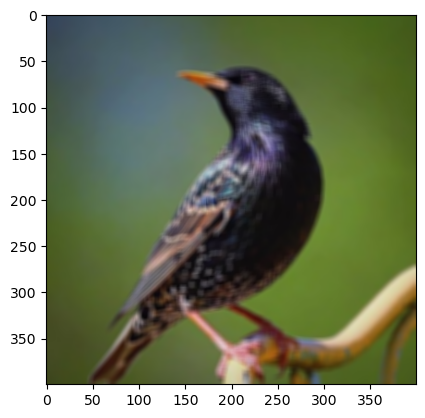

In [6]:
bk = np.ones((7, 7)) / 49
resimg = apply_convolution_cv2(img, bk)
show_cv2(resimg)

## Sobel's operator

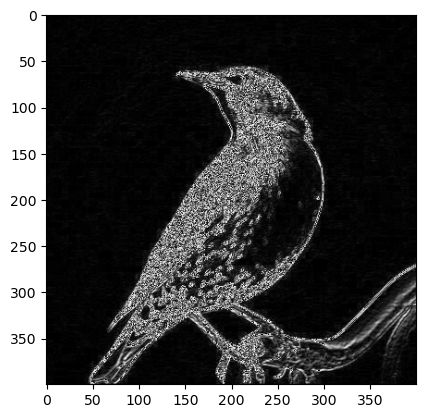

In [7]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def sobel_filter(P):
    return (np.abs((P[0] + 2 * P[1] + P[2]) - (P[6] + 2 * P[7] + P[8])) +
            np.abs((P[2] + 2 * P[6] + P[7]) - (P[0] + 2 * P[3] + P[6])))
G = generic_filter(gray_image, sobel_filter, (3, 3))

plt.imshow(G, cmap='gray')

## Gaussian blur

In [8]:
def gaussian_kernel(size, sigma):
    if size % 2 == 0:
        raise ValueError("Kernel size should be an odd number.")
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma ** 2)) * np.exp(-((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

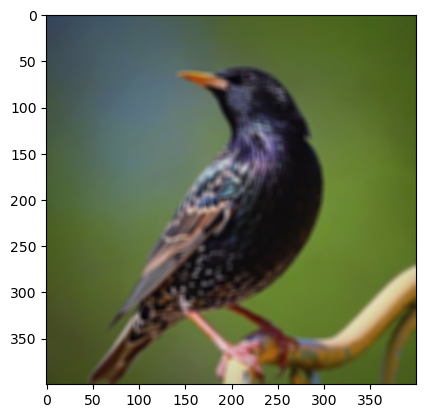

In [9]:
k_size = 7
sigma = 5

res_img = apply_convolution_cv2(img, gaussian_kernel(k_size, sigma))

show_cv2(res_img)

## Laplasian kernel

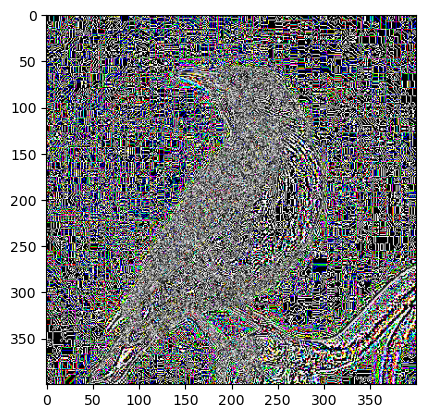

In [10]:
k = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
resimg = apply_convolution_cv2(img, k)
show_cv2(resimg)

## Random kernel

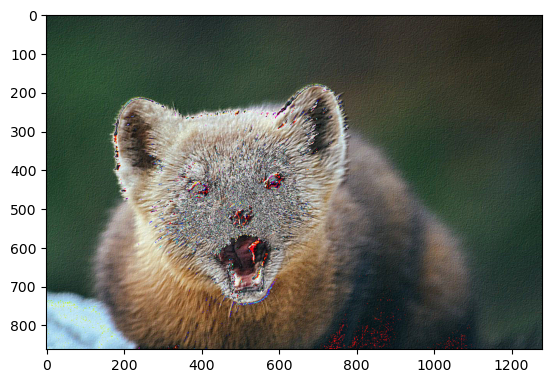

In [13]:
k = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
resimg = apply_convolution_cv2(img, k)
show_cv2(resimg)